# Dimensionality in Python

After we know how to operate with vectors and matrices in SuperCollider, we now want to compare it with its counterparts in Python.
Although Python is a [battery included language](https://www.python.org/dev/peps/pep-0206/#batteries-included-philosophy) (meaning it has already a big built-in library), we still rely on an the third-party library called [numpy](https://numpy.org/) when operating with matrices, vectors or more sophisticated mathematical expressions.

It is a unwritten rule to `import numpy as np` and for this course we will continue with this tradition.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import imageio

np.random.seed(42)

## From scalar to vector to matrix

### Scalar

We can either use the built in functions of Python to generate or transform a scalar or we can use the numpy equivalents are they are interchangeable on this level.

In [ ]:
5

5

In [ ]:
1.5

1.5

When we look up the definiton of the square root that for a $x \in \mathbb{R}_{\geq 0}$ we can also write

$$
\sqrt{x} = x^{\frac{1}{2}}
$$

which is motivated by the fact that $\left( \sqrt{x} \right) ^2 = \left( x^{\frac{1}{2}} \right)^2 = x^{2\frac{1}{2}} = x^{\frac{1}{1}} = x$.

We can use this convention to use the built in power calculation of Python to calculate a square root, but we cas also use the numpy function `sqrt`.

In [ ]:
2.0**(0.5)

1.4142135623730951

In [ ]:
np.sqrt(2.0, dtype=np.float128)

1.4142135623730950488

When using numpy we can also specify the resolution of the float variable - as a computer can only store `0` and `1` we need to find a mapping which translates this `0` and `1` to numbers between e.g. $0$ and $1$ - this is handled by [floating point precission](https://en.wikipedia.org/wiki/Single-precision_floating-point_format) and by default Python useses 64 bits to store its floating points.
With numpy we can define the type of variable we want to use for our calculation by the `dtype` argument - this will come handy later when working with neural networks.

### Vector

As in SuperCollider we can use lists to represent a collection of scalars with fixed ordering.
We can use the Python native lists to represent a vector

In [ ]:
vector = [1, 2, 3]
vector

[1, 2, 3]

but we will rely more on the *array* functionality of numpy throughout this course.

In [ ]:
np_vector = np.array([1, 2, 3])
np_vector

array([1, 2, 3])

Why we use this notation instead of the built in list will become more obvious when we want to interact with the vector.

In [ ]:
vector*2

[1, 2, 3, 1, 2, 3]

In [ ]:
np_vector*2

array([2, 4, 6])

Multiplying a scalar *n* to a internal list duplicates the list *n* times - this can come in handy when working with strings, but when working with mathematical objects we prefer to follow the mathematical interpretation of numpy - so from now on we will only focus on numpy.

When multiplying two vectors numpy performs a pairwise multiplication.

In [ ]:
np.array([1, 2, 3]) * np.array([-7, 8, 9])

array([-7, 16, 27])

Contrary to SuperCollider it does not allow us to perform this operation if the dimensions of the pairs do not match up.

In [ ]:
np.array([1, 2, 3]) * np.array([5, 3])

ValueError: operands could not be broadcast together with shapes (3,) (2,) 

### Matrices

There are two ways to define a matrix in numpy - either by providing a list of list of scalars (like in SuperCollider) or using numpy built-in functions which generates a matrix by providing a `size` (sometimes this parameter is also called `shape`).

In [ ]:
matrix_a = np.array([[1,2,3],[4,5,6],[7,8,9]])
matrix_a

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [ ]:
matrix_b = np.random.randint(low=0, high=20, size=(3, 3))
matrix_b

array([[ 6, 19, 14],
       [10,  7,  6],
       [18, 10, 10]])

We can also, just like with vectors, simply multiply a scalar to our matrix.

In [ ]:
matrix_a*2

array([[ 2,  4,  6],
       [ 8, 10, 12],
       [14, 16, 18]])

But when multiplying a matrix with another matrix we must pay attention as this does a pairwise multiplication as well - not like we have defined matrix multiplication.

In [ ]:
matrix_a*matrix_a

array([[ 1,  4,  9],
       [16, 25, 36],
       [49, 64, 81]])

But numpy has a built-in function for matrix multiplication.

In [ ]:
np.matmul(matrix_a, matrix_a)

array([[ 30,  36,  42],
       [ 66,  81,  96],
       [102, 126, 150]])

This will also verify if the dimensions of both matrices are matching.

In [ ]:
np.matmul(np.random.rand(2, 2), np.random.rand(3, 3))

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 3 is different from 2)

## Working with matrices

After we have seen the basic fundaments of matrices and vectors in Python via numpy we can now use them in an example.
Thanks to the amount of third-party libraries we can almost work with any kind of data in Python, so instead of working with audio like in SuperCollider we will take a look image data.

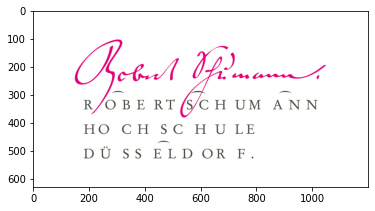

In [ ]:
image = imageio.imread('rsh_logo.jpg')
plt.imshow(image);

Digital images are stored as matrices - lets take a look at them.
We can use the `shape` parameter of an array to take a look at the dimensions - just like in SuperCollider.

In [ ]:
image.shape

(630, 1200, 3)

Taking a look at the shape it tells us that this is a $630 \times 1200 \times 3$ matrix - we have yet only encountered $m \times n$ matrices - so what is going on here?
This is called a *multi-dimensional matrix* - formerly on a $m \times n$ matrix we only defined for each index tuple $i, j$ a scalar - when working with multi dimensional arrays we do not map each index tuple $i, j$ to a scalar but to a vector of dimension $o$ - so we have a $m \times n \times o$ dimensional matrix. We could also store a matrix instead of a vector - so we now have a recursive definition which allows us to represent an arbitrary amount of *multidimensionality*.

Coming back to our image from above: For each pixel, which is located at a $x$ and $y$ position, we have a corresponding color.
This color is often represented in [RGB](https://en.wikipedia.org/wiki/RGB_color_space) in the digital domain which describes color by stating the brightness of the 3 colors **R**ed, **G**reen and **B**lue - so as a tuple.

So for each pixel we need to store 3 scalars, so a 3 dimensional vector, leading to

$$ \underbrace{630}_{\text{# of pixels in Y dimension}} \times \underbrace{1200}_{\text{# of pixels in X dimension}} \times \underbrace{3}_{\text{brightness of R, G, B}} $$

Now we take a look at how we can access and modify certain parameters in an numpy array.
We will use the `m:n` notation in Python which will select everything between `m` and `n`.
If we do not provide a value for `m` and `n` (so only writing `:`) it will select every value from this dimension.

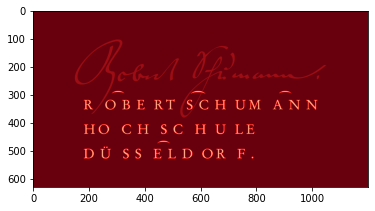

In [ ]:
# take only a look at the brightness of the red channel
plt.imshow(image[:, :, 0], cmap='Reds');

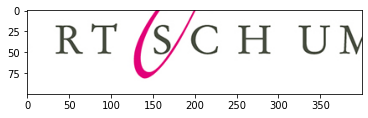

In [ ]:
# taking a look at the subset y=300 to 400 and x=400 to 800
plt.imshow(image[300:400, 400:800, :]);

We can also modify the image by using the pairwise multiplication of numpy on it to modify the colors of our pixels.

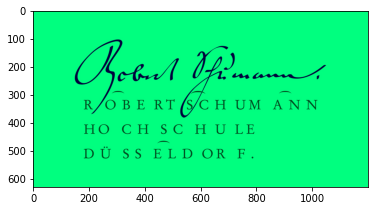

In [ ]:
# deleting the red channel and half the brightness of blue
# we divide the image by 255.0 so the RGB values are between 0 and 1
plt.imshow(image/255.0 * np.array([[[0.0, 1.0, 0.5]]]));

We can also assign certain values for a region of our image easily with this notation

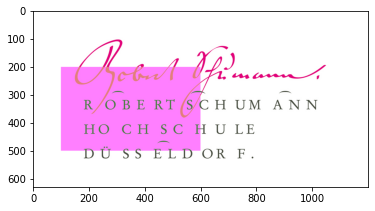

In [ ]:
# assign green = 127 for region y=200 to 500 and x=100 to 600
image[200:500, 100:600, 1] = 127
plt.imshow(image);